### Clustering Data
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Pengunjung-Mall.csv")
data.drop('IDPelanggan', 1, inplace=True)
df = pd.DataFrame(data)
df

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40
...,...,...,...,...
195,Perempuan,35,120,79
196,Perempuan,45,126,28
197,Laki,32,126,74
198,Laki,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Kelamin                     200 non-null    object
 1   Usia                        200 non-null    int64 
 2   Pendapatan (juta Rp)        200 non-null    int64 
 3   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
df.isnull().sum()

Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.describe(include="all")

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Perempuan,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [8]:
df.mean()

Usia                          38.85
Pendapatan (juta Rp)          60.56
Rating_pengeluaran (1-100)    50.20
dtype: float64

In [9]:
df.sum()

Kelamin                       LakiLakiPerempuanPerempuanPerempuanPerempuanPe...
Usia                                                                       7770
Pendapatan (juta Rp)                                                      12112
Rating_pengeluaran (1-100)                                                10040
dtype: object

In [10]:
df.median()

Usia                          36.0
Pendapatan (juta Rp)          61.5
Rating_pengeluaran (1-100)    50.0
dtype: float64

In [11]:
df.max()

Kelamin                       Perempuan
Usia                                 70
Pendapatan (juta Rp)                137
Rating_pengeluaran (1-100)           99
dtype: object

In [12]:
df.min()

Kelamin                       Laki
Usia                            18
Pendapatan (juta Rp)            15
Rating_pengeluaran (1-100)       1
dtype: object

In [13]:
df.var()

Usia                          195.133166
Pendapatan (juta Rp)          689.835578
Rating_pengeluaran (1-100)    666.854271
dtype: float64

In [14]:
df.std()

Usia                          13.969007
Pendapatan (juta Rp)          26.264721
Rating_pengeluaran (1-100)    25.823522
dtype: float64

In [15]:
df.corr(method='pearson')

,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
Usia,1.000000,-0.012398,-0.327227
Pendapatan (juta Rp),-0.012398,1.000000,0.009903
Rating_pengeluaran (1-100),-0.327227,0.009903,1.000000


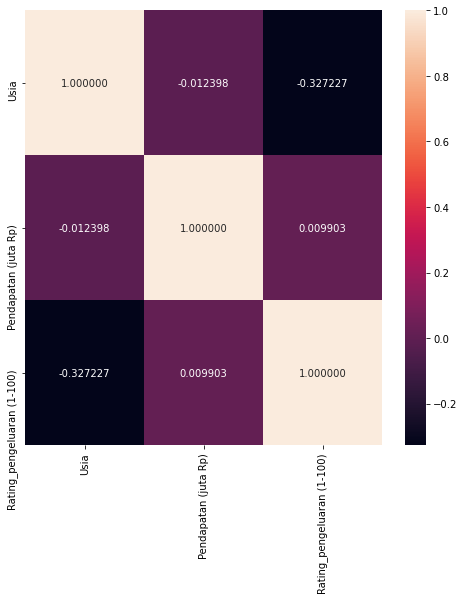

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,fmt="f")
plt.show()

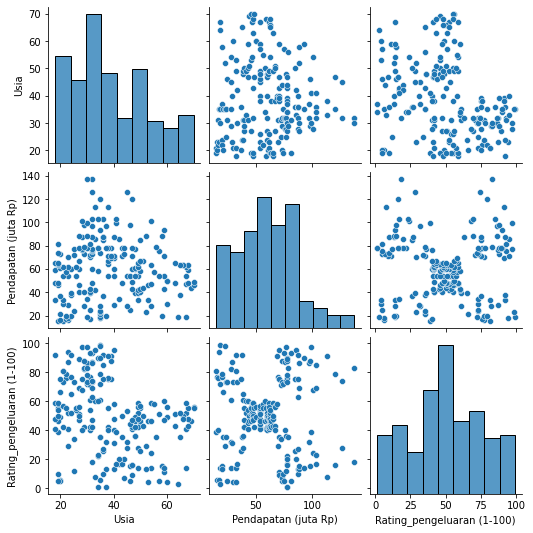

In [16]:
sns.pairplot(data=df,kind='scatter')

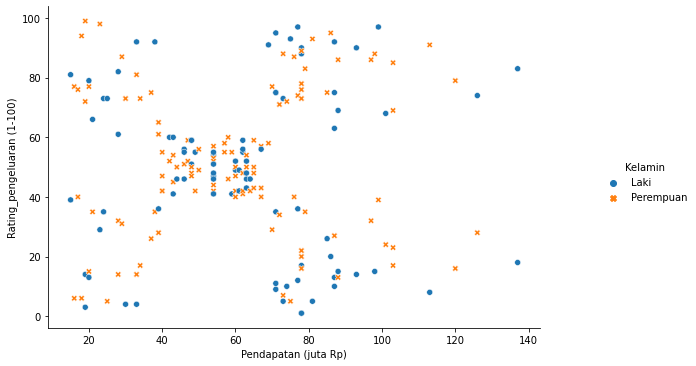

In [17]:
g=sns.relplot(x='Pendapatan (juta Rp)',y='Rating_pengeluaran (1-100)',data=df,hue='Kelamin',style='Kelamin')
g.fig.set_size_inches(10,5)
plt.show()

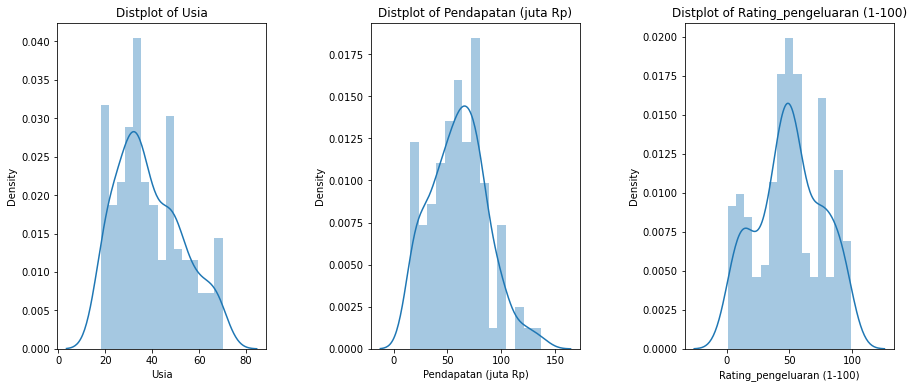

In [18]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Usia' , 'Pendapatan (juta Rp)' , 'Rating_pengeluaran (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

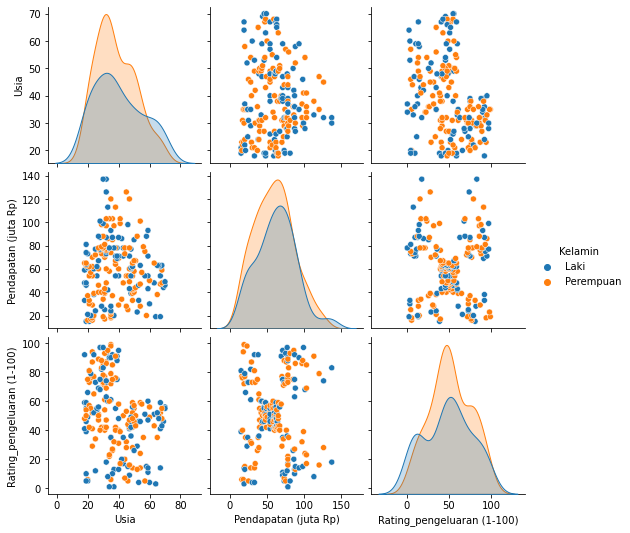

In [19]:
sns.pairplot(df,hue='Kelamin')
plt.show()

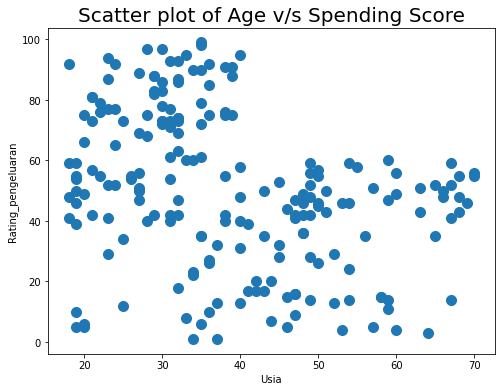

In [20]:
plt.figure(1 , figsize = (8 , 6))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Usia')
plt.ylabel('Rating_pengeluaran')
plt.scatter( x = 'Usia', y = 'Rating_pengeluaran (1-100)', data = df, s = 100)
plt.show()

In [21]:
X1 = df[['Usia' , 'Rating_pengeluaran (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

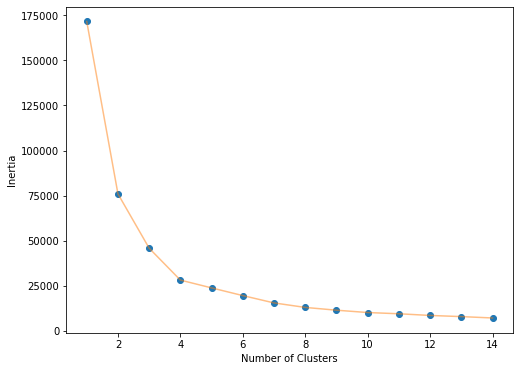

In [111]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

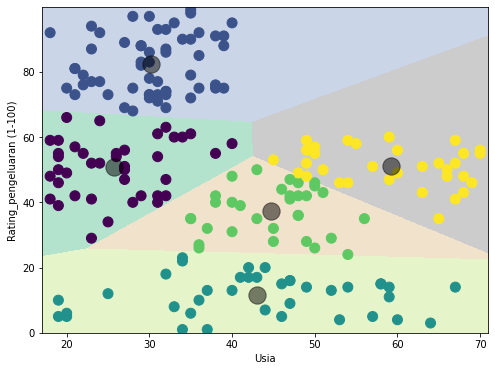

In [114]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (8 , 6) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Usia', y = 'Rating_pengeluaran (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Rating_pengeluaran (1-100)') , plt.xlabel('Usia')
plt.show()

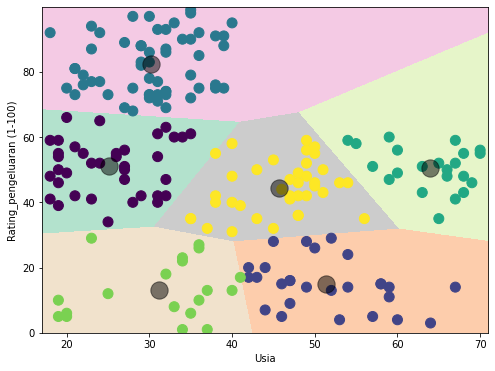

In [115]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (8 , 6) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Usia', y = 'Rating_pengeluaran (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Rating_pengeluaran (1-100)') , plt.xlabel('Usia')
plt.show()

In [112]:
X2 = df[['Pendapatan (juta Rp)' , 'Rating_pengeluaran (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

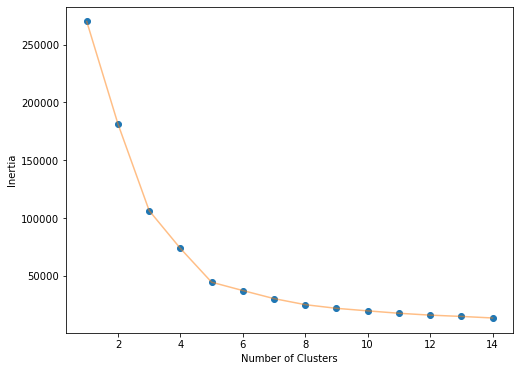

In [113]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

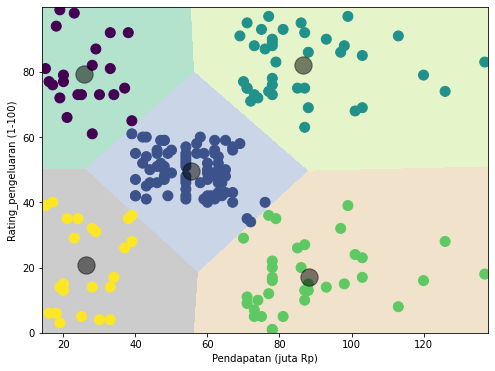

In [116]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (8 , 6) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Pendapatan (juta Rp)' ,y = 'Rating_pengeluaran (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Rating_pengeluaran (1-100)') , plt.xlabel('Pendapatan (juta Rp)')
plt.show()

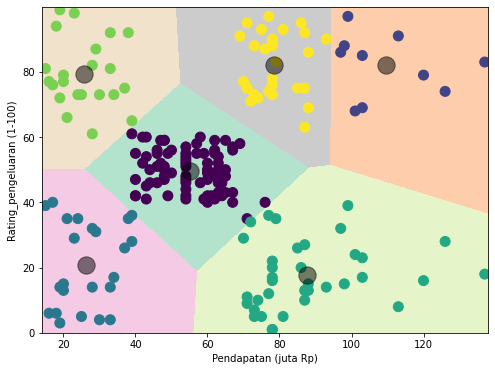

In [117]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (8 , 6) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Pendapatan (juta Rp)' ,y = 'Rating_pengeluaran (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Rating_pengeluaran (1-100)') , plt.xlabel('Pendapatan (juta Rp)')
plt.show()

In [122]:
X3 = df[['Usia' , 'Pendapatan (juta Rp)' ,'Rating_pengeluaran (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

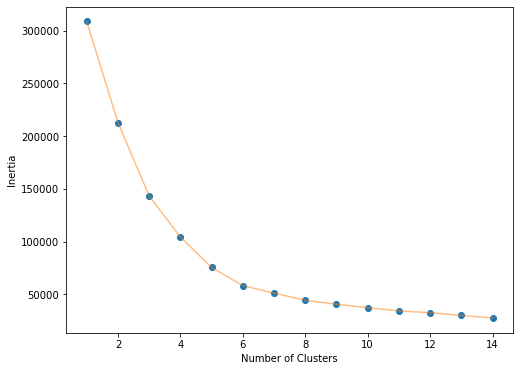

In [123]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [124]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['Cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Cluster
0,Laki,19,15,39,4
1,Laki,21,15,81,5
2,Perempuan,20,16,6,4
3,Perempuan,23,16,77,5
4,Perempuan,31,17,40,4
